In [1]:
# Create a requirements.txt file
%%writefile requirements.txt
transformers
datasets
matplotlib
umap-learn
accelerate

Writing requirements.txt


In [2]:
# Install the reqs file
!pip install -qr requirements.txt

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 527.3/527.3 kB 4.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.7/85.7 kB 5.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39.9/39.9 MB 16.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56.9/56.9 kB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 5.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [3]:
from datasets import load_dataset, DatasetDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
import torch
import numpy as np
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, accuracy_score
from transformers import Trainer, TrainingArguments
from huggingface_hub import notebook_login
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset ('emotions')
emotions = load_dataset('emotone_ar')
emotions

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/10065 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 10065
    })
})

In [6]:
emotions_train_test = emotions["train"].train_test_split(test_size=0.2, seed=42)
emotions_test_valid = emotions_train_test["test"].train_test_split(test_size=0.5, seed=42)

emotions = DatasetDict({
    'train': emotions_train_test['train'],
    'test': emotions_test_valid['train'],
    'validation': emotions_test_valid['test']
})
emotions

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 8052
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 1006
    })
    validation: Dataset({
        features: ['tweet', 'label'],
        num_rows: 1007
    })
})

In [7]:
# Let's examine the dataset
train_ds = emotions['train']
train_ds

Dataset({
    features: ['tweet', 'label'],
    num_rows: 8052
})

In [8]:
# Check smaple of the rows in traning dataset
train_ds[0:5]

{'tweet': ['ÿßŸÑŸÑŸá ŸäŸÅÿ±ÿ¨ ŸáŸÖŸáŸÖÿå ÿßÿØÿπŸäŸÑŸÜÿß ŸÜŸäÿ® ÿßÿ≥Ÿäÿß üíú',
  'ÿÆÿßŸäŸÅ ÿßÿ™ÿπŸÄŸàÿØ ÿπŸÑŸä ÿßŸÑÿØŸÜŸäÿß ÿ®ÿØŸàŸÜŸÉ ÿå Ÿáÿ∞ÿß ÿßÿ∫ŸÄÿ±ÿ® ÿÆŸàŸÅ ŸÖŸÄÿ± ÿ®ŸÄÿ≠Ÿäÿßÿ™Ÿä !',
  'q8 88: ŸÉŸéŸÑŸêŸÖŸáŸå ŸÖŸêŸÜŸíŸÉŸí . . . ÿßÿÆŸéÿ∞Ÿéÿ™ŸíŸÜŸä ÿßŸÑŸéŸä ÿπŸéÿßŸÑŸéŸÖŸç ÿßÿÆŸéÿ± ŸÑŸéŸÖŸí ÿßÿ≥Ÿíÿ™Ÿéÿ∑Ÿêÿπ ÿ®ŸéÿπŸíÿØŸéŸáÿß ÿ≥ŸéŸÖÿßÿπŸé ÿ®ÿßŸÇŸÄŸä ÿßŸÑŸÉŸéŸÑŸêŸÖÿßÿ™Ÿí ‚ô•  ÿπÿ¥ÿ¥ÿ¥ÿ¥ÿ¥ŸÇ',
  'ÿßŸÜÿß ŸÉŸÑ 5 ÿØŸÇÿßŸäŸÇ ÿ®ÿ≥ŸÖŸá ÿÆÿ®ÿ± ÿÆÿ±Ÿàÿ¨ ŸÖÿµÿ±Ÿä ŸÖŸÜ ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿßŸÑÿßŸÖŸÑ ŸÅŸä ŸÖŸÜÿ™ÿÆÿ® ÿßŸÑŸäÿØ ÿ®ŸÇÿß',
  '34: ŸÉÿ´Ÿäÿ±Ÿá ŸáŸä ÿßŸÑŸÑÿ≠ÿ∏ÿßÿ™ ÿßŸÑÿ™Ÿä ÿßÿπŸäÿ¥Ÿáÿß ÿ®ŸäŸÜ ÿßŸÑŸÜÿßÿ≥   ÿ≥ŸáŸäŸÑ  ŸÜÿ®Ÿàÿ°Ÿá ÿßŸÑÿπÿ¥ŸÇ  ŸÖŸÑÿ™ŸÇŸä ÿßŸÑÿßŸÇŸÑÿßŸÖ  ÿ∑ŸÑÿßÿ≥ŸÖ ÿßŸÑÿ≠ÿ®  ŸÅÿ¨ÿ± ŸÑŸÑÿ™ÿ®ÿßÿØŸÑ  ÿßŸÑŸÖŸÑŸàŸÉ ŸÑŸÑÿ™ÿ®ÿßÿØŸÑ'],
 'label': [5, 7, 4, 0, 3]}

In [9]:
# Check the datatypes and class names
train_ds.features

{'tweet': Value(dtype='string', id=None),
 'label': ClassLabel(names=['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear'], id=None)}

In [10]:
# Let's convert it to pandas for easy working
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

tweet  label
0                 ÿßŸÑŸÑŸá ŸäŸÅÿ±ÿ¨ ŸáŸÖŸáŸÖÿå ÿßÿØÿπŸäŸÑŸÜÿß ŸÜŸäÿ® ÿßÿ≥Ÿäÿß üíú      5
1  ÿÆÿßŸäŸÅ ÿßÿ™ÿπŸÄŸàÿØ ÿπŸÑŸä ÿßŸÑÿØŸÜŸäÿß ÿ®ÿØŸàŸÜŸÉ ÿå Ÿáÿ∞ÿß ÿßÿ∫ŸÄÿ±ÿ® ÿÆŸàŸÅ ŸÖ...      7
2  q8 88: ŸÉŸéŸÑŸêŸÖŸáŸå ŸÖŸêŸÜŸíŸÉŸí . . . ÿßÿÆŸéÿ∞Ÿéÿ™ŸíŸÜŸä ÿßŸÑŸéŸä ÿπŸéÿß...      4
3  ÿßŸÜÿß ŸÉŸÑ 5 ÿØŸÇÿßŸäŸÇ ÿ®ÿ≥ŸÖŸá ÿÆÿ®ÿ± ÿÆÿ±Ÿàÿ¨ ŸÖÿµÿ±Ÿä ŸÖŸÜ ÿßŸÑÿßŸàŸÑŸäŸÖÿ®Ÿä...      0
4  34: ŸÉÿ´Ÿäÿ±Ÿá ŸáŸä ÿßŸÑŸÑÿ≠ÿ∏ÿßÿ™ ÿßŸÑÿ™Ÿä ÿßÿπŸäÿ¥Ÿáÿß ÿ®ŸäŸÜ ÿßŸÑŸÜÿßÿ≥   ÿ≥...      3

In [11]:
# Because the labels are represented in integers. I will create a function to map the integers to strings
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

# Apply above function to the label column in the DF
df['label_name'] = df['label'].apply(label_int2str)

# Check again
df.head()

tweet  label label_name
0                 ÿßŸÑŸÑŸá ŸäŸÅÿ±ÿ¨ ŸáŸÖŸáŸÖÿå ÿßÿØÿπŸäŸÑŸÜÿß ŸÜŸäÿ® ÿßÿ≥Ÿäÿß üíú      5   sympathy
1  ÿÆÿßŸäŸÅ ÿßÿ™ÿπŸÄŸàÿØ ÿπŸÑŸä ÿßŸÑÿØŸÜŸäÿß ÿ®ÿØŸàŸÜŸÉ ÿå Ÿáÿ∞ÿß ÿßÿ∫ŸÄÿ±ÿ® ÿÆŸàŸÅ ŸÖ...      7       fear
2  q8 88: ŸÉŸéŸÑŸêŸÖŸáŸå ŸÖŸêŸÜŸíŸÉŸí . . . ÿßÿÆŸéÿ∞Ÿéÿ™ŸíŸÜŸä ÿßŸÑŸéŸä ÿπŸéÿß...      4       love
3  ÿßŸÜÿß ŸÉŸÑ 5 ÿØŸÇÿßŸäŸÇ ÿ®ÿ≥ŸÖŸá ÿÆÿ®ÿ± ÿÆÿ±Ÿàÿ¨ ŸÖÿµÿ±Ÿä ŸÖŸÜ ÿßŸÑÿßŸàŸÑŸäŸÖÿ®Ÿä...      0       none
4  34: ŸÉÿ´Ÿäÿ±Ÿá ŸáŸä ÿßŸÑŸÑÿ≠ÿ∏ÿßÿ™ ÿßŸÑÿ™Ÿä ÿßÿπŸäÿ¥Ÿáÿß ÿ®ŸäŸÜ ÿßŸÑŸÜÿßÿ≥   ÿ≥...      3    sadness

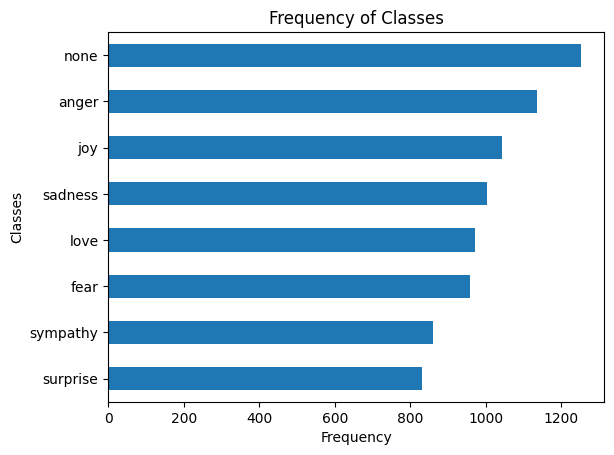

In [12]:
# Let's exmaine the class distribution
df['label_name'].value_counts(ascending=True).plot(kind='barh')
plt.title('Frequency of Classes', fontsize=12, c='k')
plt.ylabel('Classes')
plt.xlabel('Frequency')
plt.show()

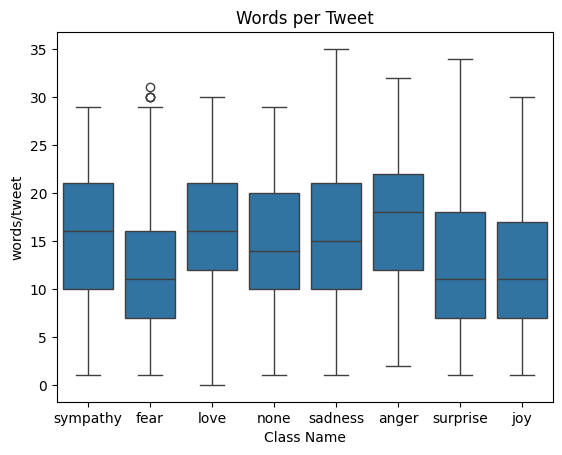

In [13]:
# Check the distribution of tweets length per each class
df['words/tweet'] = df['tweet'].str.split().apply(len)

# Plotting
sns.boxplot(data=df, y='words/tweet', x='label_name')
plt.title('Words per Tweet', fontsize=12, c='k')
plt.xlabel('Class Name')
plt.ylabel('words/tweet')
plt.show()

In [14]:
# Reset Format from pandas to nested dictionary
emotions.reset_format()

### `Data Preprocessing`

In [15]:
# Get the model checkPoint and load the tokenizer
model_ckpt = 'distilbert/distilbert-base-multilingual-cased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [16]:
# Let's examine the tokenizer
text = 'Ÿäÿ¨ÿ® ÿßŸÜ ÿ™ŸÉŸàŸÜ ÿ±ÿ≠ŸäŸÖÿß'
encoded_text = tokenizer(text, return_tensors='pt')
print(encoded_text )

{'input_ids': tensor([[  101, 44511, 14269, 24027,   773, 40926, 14495,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


In [17]:
# To get the tokens itself
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids[0], skip_special_tokens=False)
print(tokens)

['[CLS]', 'Ÿäÿ¨ÿ®', 'ÿßŸÜ', 'ÿ™ŸÉŸàŸÜ', 'ÿ±', '##ÿ≠Ÿä', '##ŸÖÿß', '[SEP]']


In [18]:
# To return back to the original text
regen_text = tokenizer.convert_tokens_to_string(tokens)
print(regen_text)

[CLS] Ÿäÿ¨ÿ® ÿßŸÜ ÿ™ŸÉŸàŸÜ ÿ±ÿ≠ŸäŸÖÿß [SEP]


In [19]:
# We can check the vocab. size and the max-length of context window
print(f'The vocab size of DistillBert Model is: {tokenizer.vocab_size}')
print(f'The context window of DistillBert Model is: {tokenizer.model_max_length}')

The vocab size of DistillBert Model is: 119547
The context window of DistillBert Model is: 512


In [20]:
# Ok. Let's tokenize the whole dataset
def tokenize_fn(batch):
  ## Padding the short sentences and truncate the long sentences
  return tokenizer(batch['tweet'], padding=True, truncation=True, max_length=512, return_tensors='pt')

# Examine the function (for the first two examples in the dataset)
tokenize_fn(emotions['train'][0:2])

{'input_ids': tensor([[   101,  15764,    793,  24455,  13027,  39468,  10700,    752,    763,
          10658,  32160,  66803,  10429,    789,  26917,  11722,  14431,    100,
            102,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0],
        [   101,    770,  67261,  11687,    763,  10502,  11693, 105563,  16351,
          19163,  59901,  22955,  14431,  32220,  12497,    752,  13498,    763,
          17329, 105563,  30075,    770,  22468,    788, 105563,  10673,  20496,
          40926, 104061,    106,    102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [21]:
# Apply the above function of tokenization to the whole dataset
emotions_encoded = emotions.map(tokenize_fn, batched=True, batch_size=None)

# I dont specify the batch_size to apply to the whole dataset as a single batch. to make the input_ids and attention_mask of the same shape globally

# Check after tokenizing
emotions_encoded['train'].column_names

Map:   0%|          | 0/8052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1006 [00:00<?, ? examples/s]

Map:   0%|          | 0/1007 [00:00<?, ? examples/s]

['tweet', 'label', 'input_ids', 'attention_mask']

### `Training a Text Classifier`

In [22]:
# check CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'The device is: {device}')

The device is: cuda


In [23]:
# Load the DistillBert model from its checkpoint
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

* `Try on Test Example`

In [24]:
# Extracting the last hidden states
text = 'Ÿáÿ∞Ÿá ÿ™ÿ¨ÿ±ÿ®ÿ©'
inputs_test = tokenizer(text, return_tensors='pt')
tokens_test = tokenizer.convert_ids_to_tokens(inputs_test.input_ids[0], skip_special_tokens=False)

print('Tokens:')
print(tokens_test)
print()
print(f'Input tensor shape {inputs_test["input_ids"].size()}') # Has the shape of [batch_size x n_tokens]

Tokens:
['[CLS]', 'Ÿáÿ∞Ÿá', 'ÿ™', '##ÿ¨ÿ±', '##ÿ®ÿ©', '[SEP]']

Input tensor shape torch.Size([1, 6])


In [25]:
# Pass tensors to GPU
inputs_test = {k: v.to(device) for k, v in inputs_test.items()}


# Get the model hidden states
# Using this context manager to disable calculation of the gradient
with torch.no_grad():
  outputs_test = model(**inputs_test)

print(outputs_test)

BaseModelOutput(last_hidden_state=tensor([[[-3.1620e-02, -7.1842e-02,  5.6872e-01,  ...,  2.1492e-03,
           9.2657e-02, -1.3430e-01],
         [-1.4289e-02, -3.8059e-01,  1.3370e+00,  ..., -2.0478e-04,
           3.0479e-01,  3.9457e-02],
         [-1.5794e-01, -4.5034e-01,  1.0449e+00,  ..., -2.0020e-02,
           1.4894e-01, -1.1076e-01],
         [-5.6971e-01, -2.4775e-01,  1.4174e+00,  ..., -4.4927e-02,
           6.0045e-01, -1.7526e-01],
         [-2.2477e-01, -2.6093e-01,  1.8044e+00,  ...,  5.3359e-02,
          -1.6491e-02, -3.5348e-01],
         [ 6.0244e-02, -2.6044e-01,  1.2011e+00,  ..., -1.7392e-01,
           5.5356e-02, -8.6988e-02]]], device='cuda:0'), hidden_states=None, attentions=None)


In [26]:
# Let's look at the shape of the hidden state tensor
outputs_test.last_hidden_state.size()  # Has shape of [batch_size x n_tokens x hidden_dim].

# it means that a 768-dimensional vector is returned for each of 6 tokens in my test example

torch.Size([1, 6, 768])

In [27]:
# It is common practice to use just the hidden state of the [CLS] token.
outputs_test.last_hidden_state[:, 0, :].size()  # taking the first token only [CLS] for classification

torch.Size([1, 768])

* `Apply on my dataset`

In [28]:
# Let's combine that in function
def extract_hidden_states_fn(batch):

  # Place the model input to the GPU
  inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

  # Extract the last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state

  ## Get only the vector of the first token [CLS], and convert back to cpu and numpy
  return {'hidden_state': last_hidden_state[:, 0, :].cpu().numpy()}

# Convert the tokenized numerical data (input_ids, attention_mask, label) to tensors
# I already tokenize the dataset, so I dont even need the text column
emotions_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Apply the above function using the magic function (map) on the tokenized data
emotions_hidden = emotions_encoded.map(extract_hidden_states_fn, batched=True, batch_size=1000)
emotions_hidden

Map:   0%|          | 0/8052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1006 [00:00<?, ? examples/s]

Map:   0%|          | 0/1007 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 8052
    })
    test: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 1006
    })
    validation: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 1007
    })
})

In [29]:
# Applying the above function has added a new column
emotions_hidden['train'].column_names

['tweet', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [30]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 8052
    })
    test: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 1006
    })
    validation: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 1007
    })
})

In [31]:
# Creating the feature matrix and the target
X = np.array(emotions_hidden['train']['hidden_state'])
y = np.array(emotions_hidden['train']['label'])

In [32]:
# Creating the feature matrix and the target (Train, Valid, and Test)

# Features
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
X_test = np.array(emotions_hidden['test']['hidden_state'])

# Target
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
y_test = np.array(emotions_hidden['test']['label'])


# Check the shapes
print('X_train.shape -->', X_train.shape)
print('y_train', y_train.shape)
print('---'*10)
print('X_valid.shape -->', X_valid.shape)
print('y_valid.shape -->', y_valid.shape)
print('---'*10)
print('X_test.shape -->', X_test.shape)
print('y_test.shape -->', y_test.shape)

X_train.shape --> (8052, 768)
y_train (8052,)
------------------------------
X_valid.shape --> (1007, 768)
y_valid.shape --> (1007,)
------------------------------
X_test.shape --> (1006, 768)
y_test.shape --> (1006,)


#### `Vizualization in 2D`

In [33]:
##Scaling the X_train features between [0, 1]
X_scaled = MinMaxScaler().fit_transform(X_train)

# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)
# Create a DF of 2D embeddings
df_embed = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])

# Add the label to make hue using it
df_embed['label'] = y_train

# Finally, Check
df_embed.head()

X          Y  label
0   7.683431  -0.915938      5
1  -0.101267  10.827234      7
2   9.219955   3.167576      4
3  13.951765   7.577074      0
4  12.255463   5.613655      3

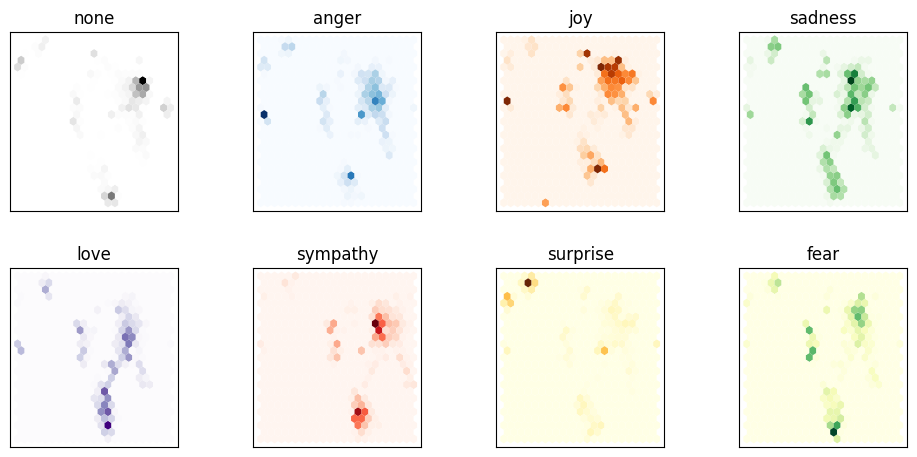

In [34]:
# Plotting (I have 6 classes)
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
fig.tight_layout(pad=2)
ax = ax.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Greens', 'Purples', 'Reds', 'YlOrBr', 'YlGn']
labels = emotions['train'].features['label'].names

# Plotting using Hexagonal Binning
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_embed_sub = df_embed.query(f'label== {i}')
  ax[i].hexbin(df_embed_sub['X'], df_embed_sub['Y'], cmap=cmap, gridsize=22, linewidth=(0,))
  ax[i].set_title(label)
  ax[i].set_xticks([])  # make no values on x axis
  ax[i].set_yticks([])  # make no value on y axis

plt.show()

### `Training a BaseLine Classifier`

In [35]:
# Let's create a function for plotting the confusion matrix
labels = emotions['train'].features['label'].names

def plot_conf_matrix_fn(y_preds, y_true):
  conf_mat = confusion_matrix(y_true, y_preds, normalize='true')
  fig, ax = plt.subplots(figsize=(6, 6))

  conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
  conf_mat_disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
  plt.title('Normalized confusion Matrix', fontsize=12, c='k')
  plt.show()

Accuracy score using LogisiticRegression 0.556


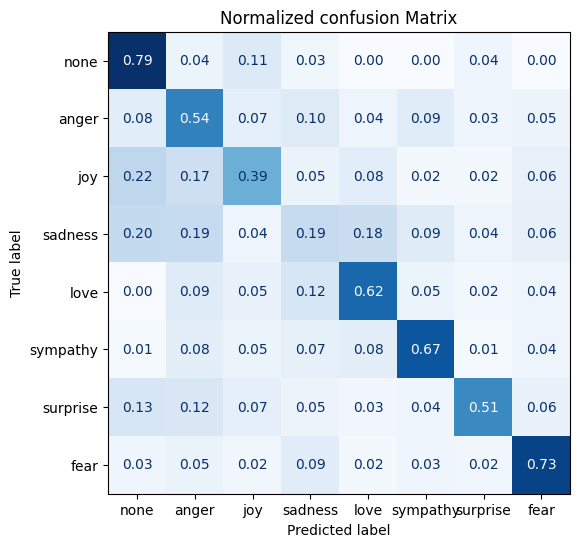

In [36]:
# Using Logistic Regression
log_clf = LogisticRegression(max_iter=3000)
log_clf.fit(X_train, y_train)

# Get the accuracy score
score_log = log_clf.score(X_valid, y_valid)
print(f'Accuracy score using LogisiticRegression {score_log:.3f}')

# Get the prediction onn valid dataset, and call the above function to draw the conf matrix
y_preds_log = log_clf.predict(X_valid)

# Call the function for plotting confusion matrix
plot_conf_matrix_fn(y_preds=y_preds_log, y_true=y_valid)

### `Fine-Tuning DistillBERT`

In [37]:
# Login using Key Token from HuggingFace (to be write permission)
notebook_login()

In [38]:
# Load the model with random weights of head classifier
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=8).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
# Define the performance metrics (I will use accuracy and f1_score)
def compute_metrics_fn(pred):
  labels = pred.label_ids  # The Ground Truth
  preds = pred.predictions.argmax(-1)   # The predictions

  # Calculate the f1 & accuracy
  f1 = f1_score(labels, preds, average='weighted')  # It is multiclass
  acc = accuracy_score(labels, preds)
  return {'accuracy': acc, 'f1': f1}

In [44]:
# Prepare the training arguments
batch_size = 32
logging_steps = len(emotions_encoded['train']) // batch_size

# a checkpoint name
my_model_chkpt = f'{model_ckpt}-finetuned'

# Define some training arguments
training_args = TrainingArguments(output_dir=my_model_chkpt,
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy='epoch',
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level='info')

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [45]:
# Initialize the Trainer API
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics_fn,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer)

# Start Training
trainer.train();

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 8,052
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2,520
  Number of trainable parameters = 135,330,824


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 1007
  Batch size = 32
Saving model checkpoint to distilbert/distilbert-base-multilingual-cased-finetuned/checkpoint-500
Configuration saved in distilbert/distilbert-base-multilingual-cased-finetuned/checkpoint-500/config.json
Model weights saved in distilbert/distilbert-base-multilingual-cased-finetuned/checkpoint-500/model.safetensors
tokenizer config file saved in distilbert/distilbert-base-multilingual-cased-finetuned/checkpoint-500/tokenizer_config.json
Special tokens file saved in distilbert/distilbert-base-multilingual-cased-finetuned/checkpoint-500/special_tokens_map.json
tokenizer config file saved in distilbert/distilbert-base-multilingual-cased-finetuned/token

In [46]:
# Examine the performance of the model on the validation dataset
preds_output_valid = trainer.predict(emotions_encoded['validation'])
preds_output_valid

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 1007
  Batch size = 32


PredictionOutput(predictions=array([[ 3.3409698 , -2.208519  , -1.1696254 , ..., -4.1798925 ,
        -0.16396414, -2.4064107 ],
       [ 2.5808814 ,  2.5912118 , -4.0110435 , ..., -2.942317  ,
         2.8105745 , -1.8384429 ],
       [-3.3985682 , -2.2306538 , -1.3483078 , ..., -1.095473  ,
        -2.5482433 , -1.209823  ],
       ...,
       [ 6.8556156 , -2.1405365 ,  0.37221158, ..., -3.7080278 ,
        -1.1717075 , -1.7866303 ],
       [-1.3024536 , -1.5190973 , -1.7416968 , ...,  7.5219646 ,
        -1.8104416 , -1.1066513 ],
       [-2.839913  , -1.8216915 , -1.61759   , ..., -1.9544016 ,
        -1.9781651 ,  8.009434  ]], dtype=float32), label_ids=array([0, 1, 3, ..., 0, 5, 7]), metrics={'test_loss': 1.6740436553955078, 'test_accuracy': 0.6643495531281033, 'test_f1': 0.6611042747196898, 'test_runtime': 2.4083, 'test_samples_per_second': 418.14, 'test_steps_per_second': 13.287})

In [47]:
# Get the metrics for the validation dataset
preds_output_valid.metrics

{'test_loss': 1.6740436553955078,
 'test_accuracy': 0.6643495531281033,
 'test_f1': 0.6611042747196898,
 'test_runtime': 2.4083,
 'test_samples_per_second': 418.14,
 'test_steps_per_second': 13.287}

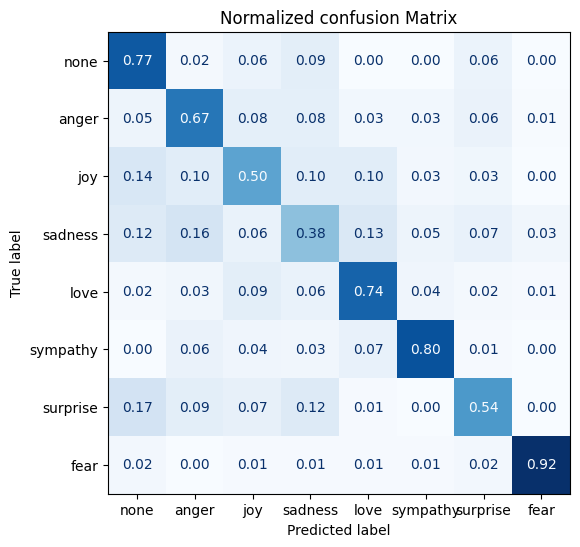

In [48]:
# Get the y_predictions
y_preds_valid = np.argmax(preds_output_valid.predictions, axis=1)

# Plotting the confusion matrix --> Calling the above function
plot_conf_matrix_fn(y_preds=y_preds_valid, y_true=y_valid)

### `Error Analysis`

In [49]:
from torch.nn.functional import cross_entropy

In [50]:
# Let's investigate the models's predictions much more
# What about sorting the validation samples by the model loss (cross entropy)


def forward_pass_label_and_loss(batch):

  # Pass the tensors to device like we did to the model
  inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

  # inference with no gradients calculations
  with torch.no_grad():
    outputs = model(**inputs)  # Model here is my fine-tuned model with the classifier head
    pred_label = torch.argmax(outputs.logits, axis=-1)  # Getting the class index that has the top logit (max score)
    loss = cross_entropy(input=outputs.logits, target=batch['label'].to(device), reduction='none')
    return {'loss': loss.cpu().numpy(), 'predicted_label': pred_label.cpu().numpy()}


# Using the magic function (map) and apply thr above function on validation dataset
emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_label_and_loss, batched=True, batch_size=16)

# Check again: Created two new cols as expected (loss & predicted_label)
emotions_encoded['validation']

Map:   0%|          | 0/1007 [00:00<?, ? examples/s]

Dataset({
    features: ['tweet', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
    num_rows: 1007
})

In [52]:
# Convert to pandas
emotions_encoded.set_format('pandas')
cols = ['tweet', 'label', 'predicted_label', 'loss']

# Slicing the cols from the validation dataset only to work on them
df_valid_sample = emotions_encoded['validation'][:][cols]

# Convert the label & predicted_label cols to string
df_valid_sample['label'] = df_valid_sample['label'].apply(label_int2str)
df_valid_sample['predicted_label'] = df_valid_sample['predicted_label'].apply(label_int2str)

# Sort descending by loss
df_valid_sample.sort_values(by='loss', ascending=False, inplace=True)

# Check head the DF (the loss is high at the start of DF)
df_valid_sample.head(10)

tweet     label  \
88   Ÿà ŸáŸäÿß ÿ™ŸàÿµŸäŸÜŸä ÿßŸÜ ÿßŸÖÿ≥ŸÉŸáÿß ŸÖŸÜ ŸäÿØŸáÿß ŸÉŸç ŸÑÿß ÿßÿ∂Ÿäÿπ ŸàŸáŸäÿß...      love   
740  ŸÖÿØÿ±Ÿä ŸÑŸäÿ¥ ÿßŸÑÿ≥ÿÆÿ±ŸäŸá ŸÖŸÜ ÿßÿµÿ≠ÿßÿ® ÿßŸÑŸÑÿ≠Ÿä ŸàÿßŸÑŸÖŸÑÿ™ÿ≤ŸÖŸäŸÜ ŸàŸÉÿß...  sympathy   
172  :  ŸÖÿ∂ÿßŸäÿß ÿ™ŸÖŸàÿ™ ÿ¨ŸàÿπÿßŸã ŸÑŸÉŸÜ ŸÇŸàÿßÿ™ŸÜÿß ÿ®ÿßŸÑÿ™ÿ≠ÿßŸÑŸÅ ÿ™ÿ±ŸÉÿ≤ ÿπ...  sympathy   
958  : ÿ≠ÿ≥ÿ®ŸÜÿß ÿßŸÑŸÑŸá ŸàŸÜÿπŸÖ ÿßŸÑŸàŸÉŸäŸÑ.  ŸÖŸÑÿ≠ŸÖŸá ÿ≠ŸÑÿ® ÿßŸÑŸÉÿ®ÿ±Ÿä   ...     anger   
798  ÿßÿ≠ÿ®ÿßÿ®ŸÜÿß ÿßŸÜŸä ÿßÿ∫ÿßŸÑÿ® ÿ≠ÿ≥ÿ±ŸáŸã ŸÖÿ¥ÿ®Ÿàÿ®ŸáŸã ŸàÿπŸÑŸä ÿßŸÑÿßÿ≥Ÿä ÿßÿ™ÿ¨...  sympathy   
76       : ÿßŸÑŸÇÿ±ÿ∂ÿßŸàŸä: ÿßŸÑŸÑŸá ÿßŸÅÿ¥ŸÑ ÿßŸÑÿßŸÜŸÇŸÑÿßÿ® ÿßŸÑŸÇÿ∞ÿ± ŸÅŸä ÿ™ÿ±ŸÉŸäÿß      none   
562  al9dee8: Ÿäÿßÿ±ÿ® ÿ®ÿ¥ÿ±Ÿá ÿ®ŸÖÿß ŸÑÿß ÿπŸäŸÜ ÿ±ÿßÿ™ ŸàŸÑÿß ÿßÿ∞ŸÜ ÿ≥ŸÖÿπÿ™...       joy   
50                            ÿßÿÆÿ™Ÿä ŸÅŸä ŸÑÿßÿ™ŸÑÿ∑ŸÖŸä ŸàŸÑÿßÿ™ÿµŸäÿ≠Ÿä  sympathy   
86   : ÿßÿ≠ÿØŸáŸÖ ŸäŸÇÿ™ŸÑ ŸàÿßŸÑÿØÿßŸá ŸÇÿ±ÿ®ÿßŸÜÿß ŸÑŸÑÿ®ÿ∫ÿØÿßÿØŸä ŸàÿßÿÆÿ±ŸäŸÇÿ™ŸÑ ÿ±...  sympathy   
243  ŸÅÿßÿ™ÿ™ ÿ≥ŸÜŸá.. ŸÖŸäÿßÿØŸá ÿßŸÑÿ≠ŸÜÿßŸàŸä Ÿäÿßÿ¥ŸäÿÆŸá ŸäÿÆÿ±ÿ®Ÿäÿ™ ÿßŸÑŸÅÿ¨ÿ± ÿß...  surprise   

    predicted_label      loss  
88            anger  9.925732  
740           anger  9.837428  
172           anger  9.500818  
958        sympathy  9.453486  
798            love  9.447155  
76            anger  9.300711  
562        sympathy  9.172984  
50              joy  9.145383  
86            anger  9.011455  
243           anger  8.937365

In [57]:
df_valid_sample.iloc[1]['tweet']

'ŸÖÿØÿ±Ÿä ŸÑŸäÿ¥ ÿßŸÑÿ≥ÿÆÿ±ŸäŸá ŸÖŸÜ ÿßÿµÿ≠ÿßÿ® ÿßŸÑŸÑÿ≠Ÿä ŸàÿßŸÑŸÖŸÑÿ™ÿ≤ŸÖŸäŸÜ ŸàŸÉÿßŸÜŸáŸÖ ŸÑŸäÿ≥Ÿàÿß ŸÖŸÜÿß ŸàŸÉÿßŸÜŸáŸÖ ŸÉÿßÿ¶ŸÜÿßÿ™ ŸÅÿ∂ÿßÿ¶ŸäŸá ÿ∫ÿ±Ÿäÿ®Ÿá ÿπŸÜÿß!ŸáŸÖ ŸÑŸäÿ≥Ÿàÿß Ÿàÿßÿ≠ÿØÿß ÿßŸàŸÜÿ≥ÿÆŸá Ÿàÿßÿ≠ÿØŸá  ŸÑÿß ÿ™ÿ™ÿ≤Ÿàÿ¨Ÿä ŸÖÿ∑Ÿàÿπ'

> `There are some incorrect labelling of some instances in the dataset, That may causes errors in fine-tuned model`

In [53]:
# Check the tail DF (the loss is low at the end of DF)
df_valid_sample.tail(10)

tweet label predicted_label  \
483                    ÿÆÿßŸäŸÅŸá ÿßŸÇŸàŸÑŸá ÿπŸÜ ÿ¥ÿπŸàÿ±Ÿä ŸàÿßÿÆÿ≥ÿ±Ÿá üò©‚ù§Ô∏è  fear            fear   
101  ŸÖŸäÿ™Ÿá ŸÜŸàŸÖ Ÿà ÿÆÿßŸäŸÅŸá ÿßÿ∑ŸÑÿπ ŸÑÿ∫ÿ±ŸÅÿ™Ÿä ŸÑÿßŸÜ ÿßÿ®ŸàŸä ŸÖÿ≥ÿßŸÅÿ± ŸàŸÖ...  fear            fear   
226             ÿÆÿßŸäŸÅŸá ÿßŸÜŸàÿ∂ ŸÖÿßŸÖÿß ÿ™ÿ≤ÿ±ÿ∑ŸÜŸä ŸÖÿπÿßŸáÿß ŸÅŸä ÿßŸÑÿ∫ÿØÿßÿ°  fear            fear   
540                                    ÿßŸÜÿß ÿÆÿßŸäŸÅŸá ÿπŸÑŸäŸÉŸä  fear            fear   
406         ÿÆÿßŸäŸÅŸá ÿßŸÖÿ≥ŸêŸÉ ŸÅ ÿßŸäÿØŸÉÿå ÿ™ÿ±ÿ¨ŸéÿπŸÜŸä ÿ™ÿßŸÜŸä ŸÑŸÑŸàÿ¨Ÿëÿπ ..  fear            fear   
759                                     01 ÿÆÿßŸäŸÅŸá ÿπŸÑŸäŸÉŸÖ  fear            fear   
650                                        ÿÆÿßŸäŸÅŸá ÿßŸÉŸÑ üòê  fear            fear   
184                  ÿÆÿßŸäŸÅŸá Ÿàÿ®ŸÇŸàŸá ŸÉŸÖÿßŸÜ ÿ®ÿ≥ ÿßŸÑÿ≥ÿ®ÿ® ŸÖÿ¨ŸáŸàŸÑ .  fear            fear   
790                               ÿÆÿßŸäŸÅŸá ÿßŸÖŸàÿ™ ŸàŸÖÿ™ÿπÿ±ŸÅÿ¥ üíî  fear            fear   
930                         ŸÑÿß ÿ¨ÿØ ÿÆÿßŸäŸÅŸá ÿßÿ∫ÿ±ÿØ Ÿàÿßÿ™ŸÅÿ¥ŸÑüòÇüòÇüòÇ  fear            fear   

         loss  
483  0.000392  
101  0.000388  
226  0.000386  
540  0.000382  
406  0.000381  
759  0.000378  
650  0.000376  
184  0.000373  
790  0.000368  
930  0.000364

In [58]:
# Finally, Saving and sharing model
trainer.push_to_hub(commit_message='Training Complete')

Saving model checkpoint to distilbert/distilbert-base-multilingual-cased-finetuned
Configuration saved in distilbert/distilbert-base-multilingual-cased-finetuned/config.json
Model weights saved in distilbert/distilbert-base-multilingual-cased-finetuned/model.safetensors
tokenizer config file saved in distilbert/distilbert-base-multilingual-cased-finetuned/tokenizer_config.json
Special tokens file saved in distilbert/distilbert-base-multilingual-cased-finetuned/special_tokens_map.json
Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Text Classification', 'type': 'text-classification'}, 'metrics': [{'name': 'Accuracy', 'type': 'accuracy', 'value': 0.6643495531281033}, {'name': 'F1', 'type': 'f1', 'value': 0.6611042747196898}]}


model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1724758266.8d1e8f5deb25.179.2:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Esmail275/distilbert-base-multilingual-cased-finetuned/commit/5777ca12bed7e382fab99392beced1f3e4bc7ea1', commit_message='Training Complete', commit_description='', oid='5777ca12bed7e382fab99392beced1f3e4bc7ea1', pr_url=None, pr_revision=None, pr_num=None)

### `Use the model via pipeline`

In [59]:
from transformers import pipeline
import logging

In [61]:
# Set logging level to ERROR to suppress informational messages
logging.getLogger('transformers').setLevel(logging.ERROR)


# Use a pipeline as a high-level helper using my checkpoint
classifier = pipeline('text-classification', model='Esmail275/distilbert-base-multilingual-cased-finetuned')

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

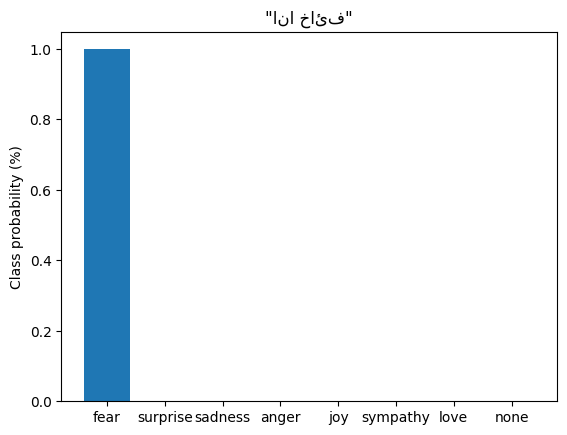

In [65]:
# Predict on custom tweet
custom_tweet = 'ÿßŸÜÿß ÿÆÿßÿ¶ŸÅ'
preds_custom = classifier(custom_tweet, top_k=None)


# ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

# Define the label mapping
label_mapping = {
    'LABEL_0': 'none',
    'LABEL_1': 'anger',
    'LABEL_2': 'joy',
    'LABEL_3': 'sadness',
    'LABEL_4': 'love',
    'LABEL_5': 'sympathy',
    'LABEL_6': 'surprise',
    'LABEL_7': 'fear'
}

# Extract class labels and scores with human-readable labels
labels = [label_mapping[pred['label']] for pred in preds_custom]
scores = [pred['score'] for pred in preds_custom]


# Plotting the class probabilities
plt.bar(labels, scores, color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel('Class probability (%)')
plt.show()

### `Evaluate on Test Dataset`

In [67]:
# Evaluate on test dataset (The dataset which will passed to classifier is just a natural language)
y_pred_test = classifier(emotions['test']['tweet'])

In [68]:
# Slicing only the number of label from the output of the classifier
preds_test = []
for each_pred in y_pred_test:
  preds_test.append(int(each_pred['label'].split('_')[-1]))

In [69]:
# Here is a DF for the test dataset contains the text, ground truth (label), and the predicted label
df_preds_test = pd.DataFrame({'text': emotions['test']['tweet'], 'label': emotions['test']['label'], 'predicted': preds_test})
df_preds_test

text  label  predicted
0     ÿßŸÜÿ™ ÿ™ŸÇŸàŸÑ ŸÖÿ¨Ÿàÿ≥Ÿä ŸÑÿπŸÜŸá ÿßŸÑŸÑŸá ÿπŸÑŸä ÿßŸäÿ±ÿßŸÜ ŸàÿßŸÑŸÖÿ¨Ÿàÿ≥ ŸàŸÉŸÑ...      1          1
1     ÿßŸÜÿ™ ÿßŸàŸÑ ÿ≠ÿ® ŸàÿßÿÆÿ± ÿ≠ÿ® ŸáÿπŸäÿ¥ ŸàŸäÿßŸá... ŸàÿßŸÑŸÑŸä ÿ®ŸäŸÜŸä Ÿàÿ®Ÿä...      2          4
2     mnsour   ÿßÿ™ŸÉÿ∞ÿ® ÿßÿ±ÿ∂ÿßÿ°ÿßŸã ŸÑŸÖŸÑŸàŸÉ ÿßŸÑÿπŸáÿ± ÿßÿ™ŸÇŸä ÿßŸÑŸÑŸá ŸÅ...      1          1
3     ÿ±ÿ¶Ÿäÿ≥ ÿ¨ŸÜŸàÿ® ÿßŸÑÿ≥ŸàÿØÿßŸÜ Ÿäÿπÿ≤ŸÑ Ÿàÿ≤ÿ±ÿßÿ° ŸÖŸàÿßŸÑŸäŸÜ ŸÑŸÖÿ¥ÿßÿ±: ÿπÿ≤ŸÑ...      1          1
4              ÿßŸÇÿπÿØ 3 ÿßŸäÿßŸÖ Ÿà ÿßŸÜÿß ÿ®ŸÜÿ≤ŸÑ 16 ÿ¨Ÿäÿ¨ÿß ŸÖŸÜ ÿßŸÑŸÜÿ™!!      6          6
...                                                 ...    ...        ...
1001  C100 ŸÉÿßÿ®ŸàŸàŸàÿ≥ ÿßŸÑŸáŸÑÿßŸÑ ŸäŸÑÿßÿ≠ŸÇ ÿßŸÑŸÜÿµÿ±ÿßŸàŸäŸäŸÜ ÿ≠ÿ™Ÿä ŸÅŸä ÿ™ÿ®...      7          4
1002                     :     shosho ÿßŸÜŸä ÿπŸÉÿ≥ŸÉŸÖ ÿÆÿßŸäŸÅŸá üò∂      7          7
1003              ÿßŸÑÿØŸÖŸàÿπ ÿ±ÿßŸÅÿ∂Ÿá ÿ™ŸÜÿ≤ŸÑ  ŸàÿßŸÑŸÇŸÑÿ® ÿ≠ÿßŸÑŸÅ ŸÖÿßŸäÿ®ÿ∑ŸÑ      3          3
1004  ÿßŸÑÿ®ÿ±ÿßÿ≤ŸäŸÑ ŸÜÿ∏ŸÖÿ™ ŸÉÿßÿ≥ ÿßŸÑÿπÿßŸÑŸÖ ŸÖŸÜ ÿ≥ŸÜÿ™ŸäŸÜ Ÿà ÿØŸÑŸàŸÇÿ™Ÿä ÿßŸÑÿß...      0          0
1005  ÿßŸäŸÜÿßÿ≥ Ÿáÿ™ŸÇÿßÿ®ŸÑ ÿßŸÑÿ±Ÿàÿ≥ŸäŸá ÿßŸÑŸÑŸä ŸàÿßÿÆÿØŸá ÿßŸÑÿ∞Ÿáÿ®ŸäŸá ÿßŸÑÿßŸàŸÑŸä...      0          0

[1006 rows x 3 columns]

In [70]:
# Get the scores on test dataset
acc_test = accuracy_score(df_preds_test['label'], df_preds_test['predicted'])
f1_test = f1_score(df_preds_test['label'], df_preds_test['predicted'], average='weighted')

print(f'The accuracy score on Test Dataset is: {acc_test:.3f}')
print(f'The f1_score on Test Dataset is: {f1_test:.3f}')

The accuracy score on Test Dataset is: 0.677
The f1_score on Test Dataset is: 0.677
